In [ ]:
!python -m spacy download en
!pip install --no-cache-dir wordcloud

In [4]:
!pip install --no-cache-dir wordcloud

In [8]:
import spacy
from datascience import *
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
with open('data/islandpoetry1_22.txt', "r") as f:
    raw = f.read()

In [11]:
raw

'The sea-scape resembles lichen twisting and\nturning for a thousand li}\nThere is no shore to land and it is difficult to\nwalk.\nWith a gentle breeze I arrived at the city\nthinking all would be so.\nAt ease, how was one to know he was to live in a\nwooden building?\n\nBecause my house had bare walls, I began\nrushing all about.\nThe waves are happy, laughing "Ha-ha!"\nWhen I arrived on Island, I heard I was\nforbidden to land.\nI could do nothing but frown and feel angry\nat heaven.\n\nAs a rule, a person is twenty before he starts\nmaking a living.\nFamily circumstances have forced me to\nexperience wind and dust.\nThe heartless months and years seem bent on\ndefeating me.\nIt is a pity that time quickly ages one.\n\nThe gold and silver of America is very\nappealing.\nJabbing an awl into the thigh in search of\nglory,\nI embarked on the journey.\nNot only are my one-thousand pieces of gold\nalready depleted, but\nMy countenance is blackened. It is surely for\nthe sake of the family

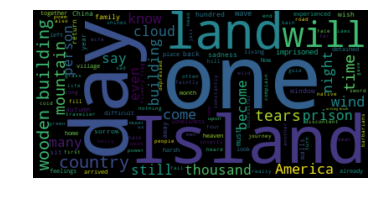

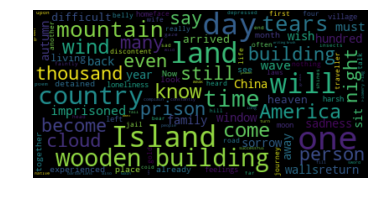

In [12]:
wordcloud = WordCloud().generate(raw)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(raw)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# formal analysis

In [13]:
len(raw.split("\n\n"))

49

In [14]:
[len(p) for p in raw.split("\n\n")]

[260,
 212,
 227,
 262,
 306,
 233,
 654,
 260,
 488,
 550,
 206,
 167,
 331,
 325,
 128,
 203,
 196,
 251,
 221,
 250,
 488,
 201,
 206,
 237,
 344,
 243,
 442,
 345,
 507,
 474,
 382,
 465,
 624,
 445,
 302,
 399,
 230,
 505,
 268,
 437,
 287,
 226,
 532,
 116,
 487,
 254,
 279,
 263,
 233]

In [15]:
np.mean([len(p) for p in raw.split("\n\n")])

325.53061224489795

In [16]:
from string import punctuation

poems = raw.split("\n\n")

all_poems_enjambment = []
for p in poems:
    lines = p.split("\n")
    enjambment = 0
    for l in lines:
        try:
            if l[-1] in punctuation:
                pass
            else:
                enjambment += 1
        except:
            pass
    enj = enjambment/len(lines)
    all_poems_enjambment.append(enj)
    
print(np.mean(all_poems_enjambment))

0.409826430441


# NLP text analysis

In [17]:
nlp = spacy.load('en', parser=False)



    Only loading the 'en' tokenizer.



In [18]:
parsed_text = nlp(raw.replace("\n", " "))

In [19]:
toks_tab = Table()
toks_tab.append_column(label="Word", values=[word.text for word in parsed_text])
toks_tab.show()

Word
The
sea
-
scape
resembles
lichen
twisting
and
turning
for


In [ ]:
toks_tab.append_column(label="POS", values=[word.pos_ for word in parsed_text])
toks_tab.show()

In [ ]:
toks_tab.where("POS", are.equal_to("ADJ")).group("Word").sort("count", descending=True)

In [ ]:
def tablefy(parsed_text):
    toks_tab = Table()
    toks_tab.append_column(label="Word", values=[word.text for word in parsed_text])
    toks_tab.append_column(label="POS", values=[word.pos_ for word in parsed_text])
    toks_tab.append_column(label="Lemma", values=[word.lemma_ for word in parsed_text])
    toks_tab.append_column(label="Stop Word", values=[word.is_stop for word in parsed_text])
    toks_tab.append_column(label="Punctuation", values=[word.is_punct for word in parsed_text])
    toks_tab.append_column(label="Space", values=[word.is_space for word in parsed_text])
    toks_tab.append_column(label="Number", values=[word.like_num for word in parsed_text])
    toks_tab.append_column(label="OOV", values=[word.is_oov for word in parsed_text])
    toks_tab.append_column(label="Dependency", values=[word.dep_ for word in parsed_text])
    return toks_tab

In [ ]:
tablefy(parsed_text).show()

In [ ]:
tablefy(parsed_text).where("Stop Word", are.equal_to(False)).where("Punctuation", are.equal_to(False)).group("Word").sort("count",descending=True)

In [ ]:
tablefy(parsed_text).where("Stop Word", are.equal_to(False)).where("Punctuation", are.equal_to(False)).where("Space", are.equal_to(False)).group("Lemma").sort("count",descending=True)

# NER

In [ ]:
ner_tab = Table()
ner_tab.append_column(label="NER Label", values=[ent.label_ for ent in parsed_text.ents])
ner_tab.append_column(label="NER Text", values=[ent.text for ent in parsed_text.ents])
ner_tab.show()

In [ ]:
ner_tab.where("NER Label", are.equal_to("GPE")).show()

In [ ]:
ner_tab.where("NER Label", are.equal_to("GPE")).to_df()['NER Text'].value_counts().plot.barh()

In [ ]:
ner_tab.where("NER Label", are.equal_to("PERSON")).to_df()['NER Text'].value_counts().plot.barh()

In [ ]:
ner_tab.where("NER Label", are.equal_to("ORG")).to_df()['NER Text'].value_counts().plot.barh()

In [ ]:
ner_tab.where("NER Label", are.equal_to("DATE")).to_df()['NER Text'].value_counts().plot.barh()

In [ ]:
ner_tab.where("NER Label", are.equal_to("TIME")).to_df()['NER Text'].value_counts().plot.barh()